In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Wine_Quality.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Séparation du jeu de données 

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
df_train, df_test = train_test_split(df, 
                                     test_size = 0.15, 
                                     stratify=df['quality'], 
                                     shuffle=True, random_state=42)
df_train.shape, df_test.shape

((1359, 12), (240, 12))

In [6]:
df_train['quality'].value_counts(normalize=True)

5    0.426049
6    0.398823
7    0.124356
4    0.033113
8    0.011038
3    0.006623
Name: quality, dtype: float64

In [7]:
X_train = df_train.copy()
y_train = X_train.pop('quality')

Pré traitement

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
std = StandardScaler()
lbl = LabelEncoder()
X_train = std.fit_transform(X_train)
y_train = lbl.fit_transform(y_train)

Cross validation avec `cross_val_score`

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, f1_score

svc = SVC(random_state=42)
svc_scores = cross_val_score(svc, X_train, y_train, 
                             cv=5, 
                             scoring=make_scorer(f1_score, average = 'macro'))

rfc = RandomForestClassifier(random_state=42)
rfc_scores = cross_val_score(rfc, X_train, y_train, 
                             cv=5, 
                             scoring=make_scorer(f1_score, average = 'macro'))

log = LogisticRegression(random_state=42)
log_scores = cross_val_score(log, X_train, y_train, 
                             cv=5, 
                             scoring=make_scorer(f1_score, average = 'macro'))


/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [49]:
print("Logistic Regression \n\t{} \n\tmean = {:.3f} \n\tstd = {:.3f}".format(np.around(log_scores, 3 ), 
                                                                     np.mean(log_scores), 
                                                                     np.std(log_scores)), 
      end = '\n\n')

print("Support Vector Classifier \n\t{} \n\tmean = {:.3f} \n\tstd = {:.3f}".format(np.around(svc_scores,3), 
                                                                            np.mean(svc_scores), 
                                                                            np.std(svc_scores)), 
      end = '\n\n')

print("Random Forest Classifier \n\t{} \n\tmean = {:.3f} \n\tstd = {:.3f}".format(np.around(rfc_scores,3), 
                                                                          np.mean(rfc_scores), 
                                                                          np.std(rfc_scores)), 
      end = '\n\n')

Logistic Regression 
	[0.313 0.253 0.234 0.262 0.301] 
	mean = 0.273 
	std = 0.030

Support Vector Classifier 
	[0.346 0.27  0.228 0.271 0.313] 
	mean = 0.286 
	std = 0.040

Random Forest Classifier 
	[0.409 0.328 0.297 0.341 0.332] 
	mean = 0.342 
	std = 0.037



Cross val score "maison"

*Utile quand il faut appliquer des transformations spéciales aux jeux d'entrainement et de validation.*

In [11]:
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5)
scores = []

for train_idx, val_idx in skf.split(X_train, y_train):

    X_train_2, X_val = X_train[train_idx], X_train[val_idx]
    y_train_2, y_val = y_train[train_idx], y_train[val_idx]

    rfc.fit(X_train_2, y_train_2)
    y_pred = rfc.predict(X_val)

    scores.append(f1_score(y_val, y_pred, average='macro'))

In [12]:
print("Random Forest Classifier \n\t{} \n\tmean = {:.3f} \n\tstd = {:.3f}".format(np.around(scores,3), 
                                                                          np.mean(scores), 
                                                                          np.std(scores)), 
      end = '\n\n')
scores

Random Forest Classifier 
	[0.344 0.297 0.343 0.314 0.337] 
	mean = 0.327 
	std = 0.019



[0.34394713589237574,
 0.29695482185514005,
 0.34323171316268813,
 0.31356734114581647,
 0.3374183623740348]

Recherche des hyperparamètres les plus influents

In [71]:
scores = {}

# n_estimators
scores['n_estimators_100'] = cross_val_score(RandomForestClassifier(random_state=42, n_estimators=100), 
                                             X_train, y_train, 
                                             cv=5, 
                                             scoring=make_scorer(f1_score, average='macro'))

scores['n_estimators_1000'] = cross_val_score(RandomForestClassifier(random_state=42, n_estimators=1000), 
                                              X_train, y_train, 
                                              cv=5, 
                                              scoring=make_scorer(f1_score, average='macro'))

# criterion
scores['criterion_gini'] = cross_val_score(RandomForestClassifier(random_state=42, criterion = 'gini'), 
                                           X_train, y_train, 
                                           cv=5, 
                                           scoring=make_scorer(f1_score, average='macro'))

scores['criterion_entropy'] = cross_val_score(RandomForestClassifier(random_state=42, criterion = 'entropy'), 
                                              X_train, y_train, 
                                              cv=5, 
                                              scoring=make_scorer(f1_score, average='macro'))

# max_depth
scores['max_depth_2'] = cross_val_score(RandomForestClassifier(random_state=42, max_depth = 2), 
                                        X_train, y_train, 
                                        cv=5, 
                                        scoring=make_scorer(f1_score, average='macro'))

scores['max_depth_32'] = cross_val_score(RandomForestClassifier(random_state=42, max_depth = 32), 
                                         X_train, y_train, 
                                         cv=5, 
                                         scoring=make_scorer(f1_score, average='macro'))

# min_samples_split
scores['min_samples_split_2'] = cross_val_score(RandomForestClassifier(random_state=42, min_samples_split = 2), 
                                        X_train, y_train, 
                                        cv=5, 
                                        scoring=make_scorer(f1_score, average='macro'))

scores['min_samples_split_32'] = cross_val_score(RandomForestClassifier(random_state=42, min_samples_split = 32), 
                                         X_train, y_train, 
                                         cv=5, 
                                         scoring=make_scorer(f1_score, average='macro'))

# min_samples_leaf
scores['min_samples_leaf_2'] = cross_val_score(RandomForestClassifier(random_state=42, min_samples_leaf = 2), 
                                        X_train, y_train, 
                                        cv=5, 
                                        scoring=make_scorer(f1_score, average='macro'))

scores['min_samples_leaf_32'] = cross_val_score(RandomForestClassifier(random_state=42, min_samples_leaf = 32), 
                                         X_train, y_train, 
                                         cv=5, 
                                         scoring=make_scorer(f1_score, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

In [72]:
scores

{'n_estimators_100': array([0.40883197, 0.32804197, 0.29706739, 0.34142857, 0.33231368]),
 'n_estimators_1000': array([0.40661032, 0.32637792, 0.3088129 , 0.33185444, 0.31709542]),
 'criterion_gini': array([0.40883197, 0.32804197, 0.29706739, 0.34142857, 0.33231368]),
 'criterion_entropy': array([0.39337119, 0.31206519, 0.31671727, 0.31805556, 0.3208065 ]),
 'max_depth_2': array([0.25365127, 0.20596544, 0.21212121, 0.21784777, 0.23030723]),
 'max_depth_32': array([0.40883197, 0.32804197, 0.29706739, 0.34142857, 0.33231368]),
 'min_samples_split_2': array([0.40883197, 0.32804197, 0.29706739, 0.34142857, 0.33231368]),
 'min_samples_split_32': array([0.36569705, 0.2763544 , 0.24236554, 0.28744598, 0.31769714]),
 'min_samples_leaf_2': array([0.40053642, 0.31180051, 0.29095667, 0.31631545, 0.33437705]),
 'min_samples_leaf_32': array([0.26165675, 0.23132844, 0.22030075, 0.22372046, 0.27080201])}

Comparaison des écarts entre les scores (un grand écart = un paramètre important)

In [73]:
for k,v in scores.items():
    print('{:<20} : min - {:.3f} / mean - {:.3f} / max - {:.3f}'.format(k,
                                                                        min(v),
                                                                        np.mean(v).round(3),
                                                                        max(v)))

n_estimators_100     : min - 0.297 / mean - 0.342 / max - 0.409
n_estimators_1000    : min - 0.309 / mean - 0.338 / max - 0.407
criterion_gini       : min - 0.297 / mean - 0.342 / max - 0.409
criterion_entropy    : min - 0.312 / mean - 0.332 / max - 0.393
max_depth_2          : min - 0.206 / mean - 0.224 / max - 0.254
max_depth_32         : min - 0.297 / mean - 0.342 / max - 0.409
min_samples_split_2  : min - 0.297 / mean - 0.342 / max - 0.409
min_samples_split_32 : min - 0.242 / mean - 0.298 / max - 0.366
min_samples_leaf_2   : min - 0.291 / mean - 0.331 / max - 0.401
min_samples_leaf_32  : min - 0.220 / mean - 0.242 / max - 0.271


In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 4, 8, 16, 32, 64],
              'min_samples_leaf' : [1, 2, 4, 8, 16, 32, 64]}
              
rfc = RandomForestClassifier(random_state=42)

In [78]:
gscv = GridSearchCV(rfc, parameters, 
                    cv=5, 
                    scoring=make_scorer(f1_score, average='macro'), 
                    verbose=3)

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ...max_depth=2, min_samples_leaf=1;, score=0.254 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


[CV 2/5] END ...max_depth=2, min_samples_leaf=1;, score=0.206 total time=   0.2s
[CV 3/5] END ...max_depth=2, min_samples_leaf=1;, score=0.212 total time=   0.2s
[CV 4/5] END ...max_depth=2, min_samples_leaf=1;, score=0.218 total time=   0.2s
[CV 5/5] END ...max_depth=2, min_samples_leaf=1;, score=0.230 total time=   0.2s
[CV 1/5] END ...max_depth=2, min_samples_leaf=2;, score=0.254 total time=   0.2s
[CV 2/5] END ...max_depth=2, min_samples_leaf=2;, score=0.206 total time=   0.2s
[CV 3/5] END ...max_depth=2, min_samples_leaf=2;, score=0.212 total time=   0.2s
[CV 4/5] END ...max_depth=2, min_samples_leaf=2;, score=0.218 total time=   0.2s
[CV 5/5] END ...max_depth=2, min_samples_leaf=2;, score=0.230 total time=   0.2s
[CV 1/5] END ...max_depth=2, min_samples_leaf=4;, score=0.254 total time=   0.2s
[CV 2/5] END ...max_depth=2, min_samples_leaf=4;, score=0.206 total time=   0.2s
[CV 3/5] END ...max_depth=2, min_samples_leaf=4;, score=0.209 total time=   0.2s
[CV 4/5] END ...max_depth=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]},
             scoring=make_scorer(f1_score, average=macro), verbose=3)

In [89]:
results = pd.DataFrame(gscv.cv_results_)
results[['params','mean_test_score','std_test_score', 'rank_test_score']].sort_values('mean_test_score', ascending=False)

,params,mean_test_score,std_test_score,rank_test_score
21,"{'max_depth': 16, 'min_samples_leaf': 1}",0.343099,0.036202,1
35,"{'max_depth': 64, 'min_samples_leaf': 1}",0.341537,0.036806,2
28,"{'max_depth': 32, 'min_samples_leaf': 1}",0.341537,0.036806,2
22,"{'max_depth': 16, 'min_samples_leaf': 2}",0.330917,0.038423,4
29,"{'max_depth': 32, 'min_samples_leaf': 2}",0.330797,0.037508,5
36,"{'max_depth': 64, 'min_samples_leaf': 2}",0.330797,0.037508,5
14,"{'max_depth': 8, 'min_samples_leaf': 1}",0.326615,0.020487,7
15,"{'max_depth': 8, 'min_samples_leaf': 2}",0.326516,0.037099,8
30,"{'max_depth': 32, 'min_samples_leaf': 4}",0.315711,0.039663,9
37,"{'max_depth': 64, 'min_samples_leaf': 4}",0.315711,0.039663,9


# Unsupervised 

- Clusterization = group the lines of the df
- Dimension reduction = Reduce the number of variables, for speed  
- Visualisation = Graphs 


- KMEANS
- DBSCAN 
- PCA 
- T-SNE
- SVD (Singular value decomposition) 

MNIST = classification 
- > Nombres 0-9

1) Ouvrir le MNIST test 
2) Combien des colonnes 
3) Afficher la premiere ligne en image  

In [28]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits() 
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

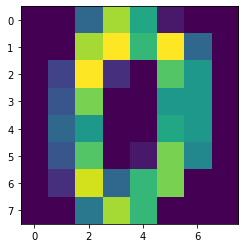

In [43]:

plt.imshow(mnist.images[0])


In [46]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 